# Marketing do Banco

Com o dataset escolhido, pretende-se analisar um conjunto de dados onde se identifica conhecimento sobre as campanhas
promocionais realizadas por um banco em que se pretende prever a adesão dos clientes após o
contacto promocional.


## O dataset contem 45211 casos e 17 features. 

### Input features (bank client data)
 - age - (numeric) 
 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 - education (categorical: 'tertiary' 'secondary' 'unknown' 'primary')
 - default: has credit in default? (categorical: 'no','yes','unknown')
 - balance: Balance the client possesses
 - housing: has housing loan? (categorical: 'no','yes','unknown')
 - loan: has personal loan? (categorical: 'no','yes','unknown')
 - contact: contact communication type (categorical: 'cellular','telephone')
 - day: last contact day (numeric)
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown', 'other','success')

## Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')
 
### Disponível em : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Importar Bibliotecas

In [385]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
%matplotlib inline

## Organização do dataset
O dataset está no formato CSV. Contudo, o separador das colunas 'e o ';'.

In [386]:
bank = pd.read_csv('bank-full.csv', sep=';')

## Exploração dos dados

Vista básica do dataset, inicial.

In [387]:
bank.shape

(45211, 17)

In [388]:
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [389]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [390]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Missing Values

Verifica-se que no dataset não existem valores perdidos.

In [391]:
bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [392]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [393]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Valores Duplicados

O dataset não tem qualquer valor duplicado.
Tratamento para caso tenha (drop).

In [394]:
print(bank.duplicated().sum())
print(bank.drop_duplicates(inplace=True))
print(bank.info())

0
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB
None


## Analisar a correspondência entre o target output e os atributos categóricos

 - 1) Analisar o target com o número de ocorrências no dataset;
 - 2) Analisar o target com o trabalho do cliente;
 - 3) Analisar o target com o estado civil do cliente;
 - 4) Analisar o target com o tipo de contacto do cliente;
 - 5) Analisar o target com o resultado da campanha anterior;
 - 6) Analisar o target com o nível de educação do cliente;
 - 7) Analisar o target com o mês onde a campanha foi efetuada;
 - 8) Analisar o target com o estado do crédito;
 - 9) Analisar o target com o empr imobiliário do cliente;
 - 10) Analisar o target com o facto do cliente ter ou não um empréstimo;

<AxesSubplot:title={'center':'Subscreveu ou não a um depósito'}>

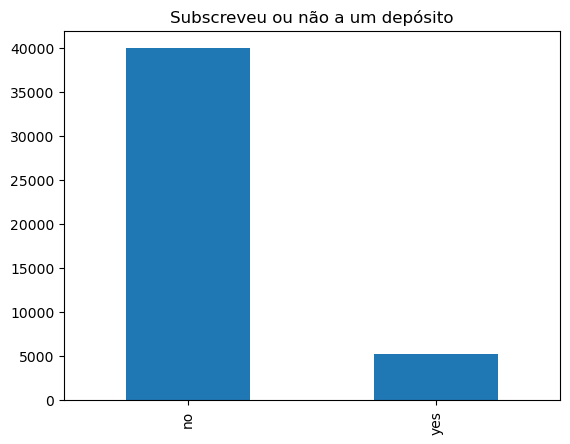

In [395]:
y_count = bank['y'].value_counts()
y_count.plot.bar(title = 'Subscreveu ou não a um depósito')

<AxesSubplot:title={'center':'Trabalho e target output'}>

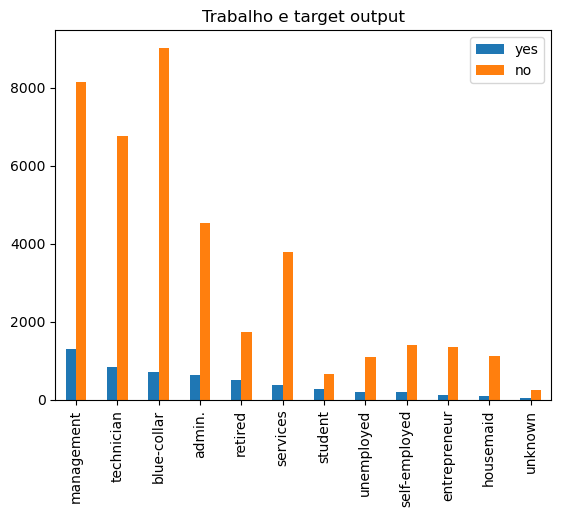

In [396]:
job_target = pd.DataFrame()

job_target['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
job_target['no'] = bank[bank['y'] == 'no']['job'].value_counts()

job_target.plot.bar(title = 'Trabalho e target output')

In [397]:
#percentagem de pessoas que subscreveram um depósito por profissão
(job_target['yes'] / (job_target['yes'] + job_target['no'])) * 100

management       13.755551
technician       11.056996
blue-collar       7.274969
admin.           12.202669
retired          22.791519
services          8.883004
student          28.678038
unemployed       15.502686
self-employed    11.842939
entrepreneur      8.271688
housemaid         8.790323
unknown          11.805556
dtype: float64

<AxesSubplot:title={'center':'Estado Civil e target output'}>

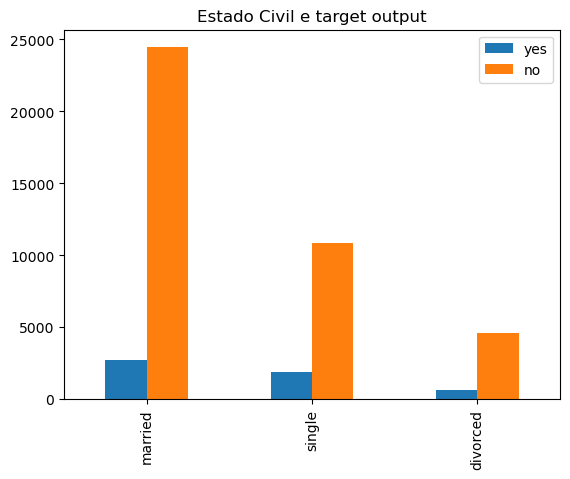

In [398]:
marital_target = pd.DataFrame()

marital_target['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
marital_target['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

marital_target.plot.bar(title = 'Estado Civil e target output')

In [399]:
#percentagem de pessoas que subscreveram um depósito por estado civil
(marital_target['yes'] / (marital_target['yes'] + marital_target['no'])) * 100

married     10.123466
single      14.949179
divorced    11.945458
dtype: float64

<AxesSubplot:title={'center':'Tipo de contacto e target output'}>

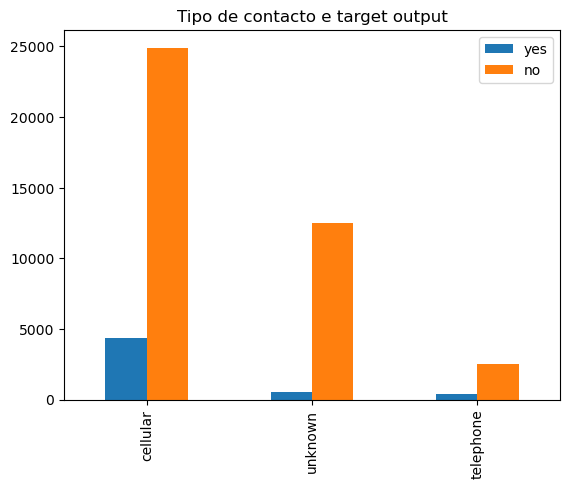

In [400]:
contact_target = pd.DataFrame()

contact_target['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
contact_target['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

contact_target.plot.bar(title = 'Tipo de contacto e target output')

In [401]:
#percentagem de pessoas que subscreveram um depósito por tipo de contacto
(contact_target['yes'] / (contact_target['yes'] + contact_target['no'])) * 100


cellular     14.918900
unknown       4.070661
telephone    13.420509
dtype: float64

<AxesSubplot:title={'center':'Resultado da campanha anterior e target output'}>

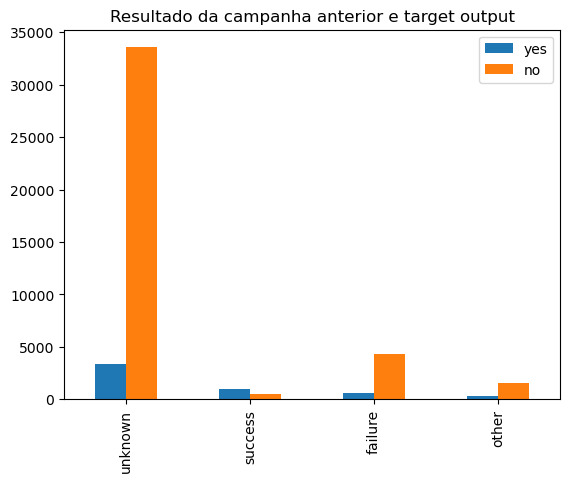

In [402]:
poutcome_target = pd.DataFrame()

poutcome_target['yes'] = bank[bank['y'] == 'yes']['poutcome'].value_counts()
poutcome_target['no'] = bank[bank['y'] == 'no']['poutcome'].value_counts()

poutcome_target.plot.bar(title = 'Resultado da campanha anterior e target output')

In [403]:
#percentagem de pessoas que subscreveram um depósito por resultado da campanha anterior
(poutcome_target['yes'] / (poutcome_target['yes'] + poutcome_target['no'])) * 100

unknown     9.161503
success    64.725347
failure    12.609671
other      16.684783
dtype: float64

<AxesSubplot:title={'center':'Nível da educação e target output'}>

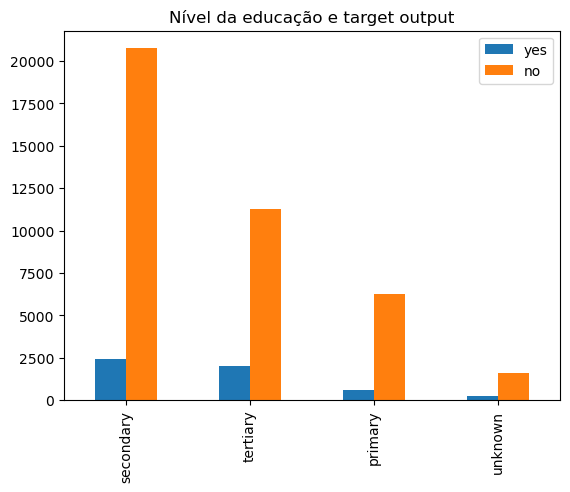

In [404]:
edu_target = pd.DataFrame()

edu_target['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
edu_target['no'] = bank[bank['y'] == 'no']['education'].value_counts()

edu_target.plot.bar(title = 'Nível da educação e target output')

In [405]:
#percentagem de pessoas que subscreveram um depósito por nível de educação
(edu_target['yes'] / (edu_target['yes'] + edu_target['no'])) * 100

secondary    10.559435
tertiary     15.006390
primary       8.626478
unknown      13.570275
dtype: float64

<AxesSubplot:title={'center':'Mês e target output'}>

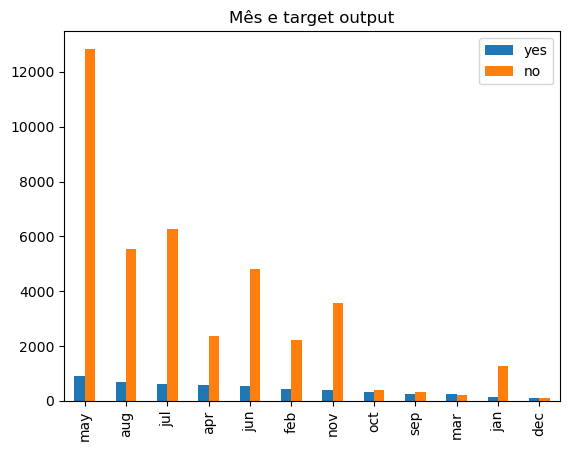

In [406]:
mon_target = pd.DataFrame()

mon_target['yes'] = bank[bank['y'] == 'yes']['month'].value_counts()
mon_target['no'] = bank[bank['y'] == 'no']['month'].value_counts()

mon_target.plot.bar(title = 'Mês e target output')

In [407]:
#percentagem de pessoas que subscreveram um depósito por mês
(mon_target['yes'] / (mon_target['yes'] + mon_target['no'])) * 100

may     6.719454
aug    11.013286
jul     9.093546
apr    19.679400
jun    10.222805
feb    16.647792
nov    10.151134
oct    43.766938
sep    46.459413
mar    51.991614
jan    10.121169
dec    46.728972
dtype: float64

<AxesSubplot:title={'center':'Crédito por default e target output'}>

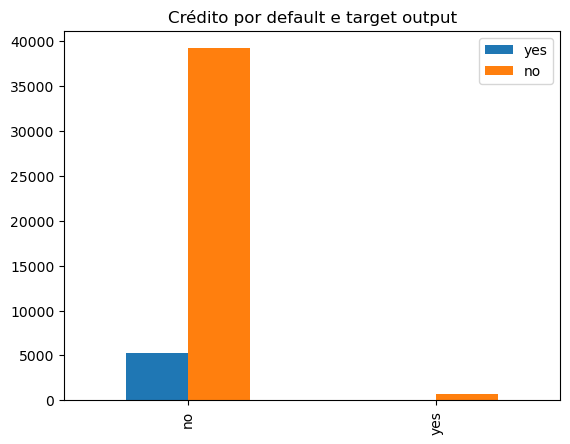

In [408]:
def_target = pd.DataFrame()

def_target['yes'] = bank[bank['y'] == 'yes']['default'].value_counts()
def_target['no'] = bank[bank['y'] == 'no']['default'].value_counts()

def_target.plot.bar(title = 'Crédito por default e target output')

<AxesSubplot:title={'center':'Empréstimo imobiliário e target output'}>

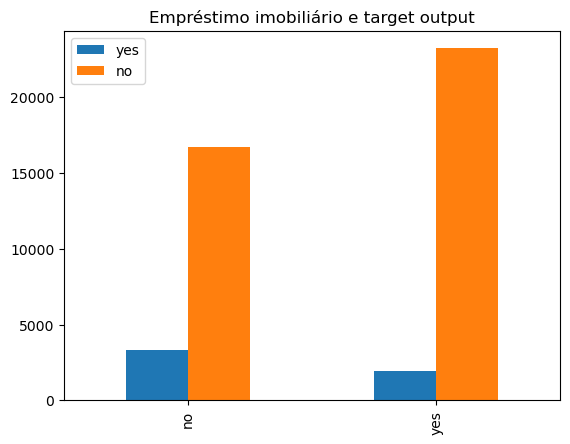

In [409]:
hou_target = pd.DataFrame()

hou_target['yes'] = bank[bank['y'] == 'yes']['housing'].value_counts()
hou_target['no'] = bank[bank['y'] == 'no']['housing'].value_counts()

hou_target.plot.bar(title = 'Empréstimo imobiliário e target output')

In [410]:
#percentagem de pessoas que subscreveram um depósito por empréstimo imobiliário
(hou_target['yes'] / (hou_target['yes'] + hou_target['no'])) * 100

no     16.702355
yes     7.699960
dtype: float64

<AxesSubplot:title={'center':'Empréstimo pessoal e target output'}>

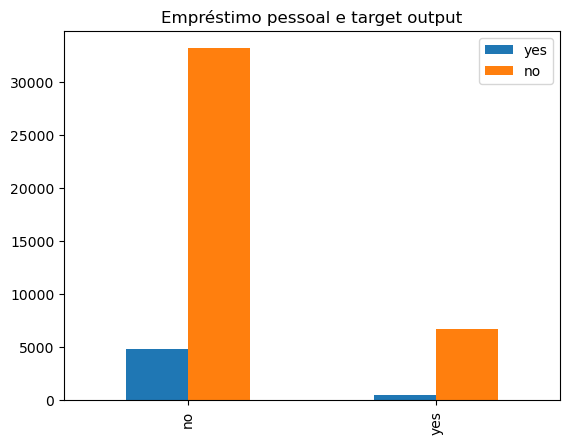

In [411]:
loan_target = pd.DataFrame()

loan_target['yes'] = bank[bank['y'] == 'yes']['loan'].value_counts()
loan_target['no'] = bank[bank['y'] == 'no']['loan'].value_counts()

loan_target.plot.bar(title = 'Empréstimo pessoal e target output')

In [412]:
#percentagem de pessoas que subscreveram um depósito por empréstimo pessoal
(loan_target['yes'] / (loan_target['yes'] + loan_target['no'])) * 100

no     12.655727
yes     6.681391
dtype: float64

## Preparação dos Dados

### Valores categóricos binários 'yes' ou 'no'

Transformar em valores numéricos (aplicar label encoding):
 - yes (target)
 - default
 - housing
 - loan

In [413]:
bank['y'] = np.where(bank['y'] == "yes", 1, 0)
bank['default'] = np.where(bank['default'] == "yes", 1, 0)
bank['housing'] = np.where(bank['housing'] == "yes", 1, 0)
bank['loan'] = np.where(bank['loan'] == "yes", 1, 0)

### Atributo 'month'

Através de label encoding, dado aos meses terem uma ordem explícita, pelos quais estão organizados.
Verificou-se em cima que em março a percentagem de aceitação do depósito é maior.

In [414]:
map_month = {'month' : {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}}
bank.replace(map_month, inplace=True)

### Atributo 'pdays'

Para este atributo "-1" simboliza que o cliente não foi contactado ou que não existe informação sobre esse dados.
No entanto, mais de 75% dos dados da coluna,m então será melhor retirá-la; dado a ser muito inconsistente.

<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

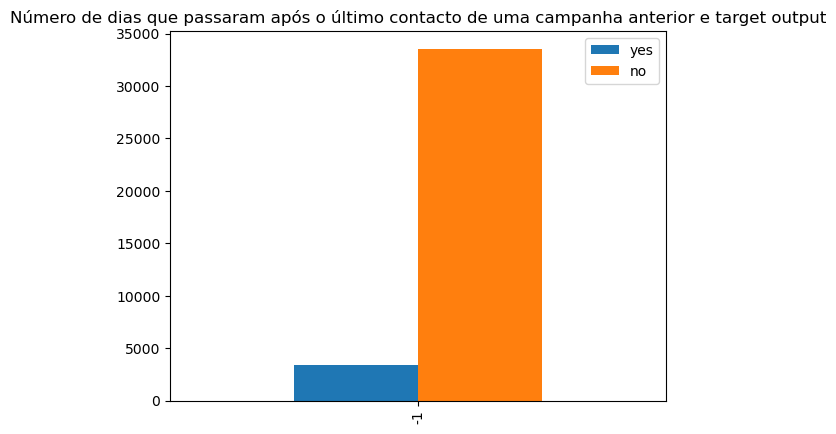

In [415]:
pdays = pd.DataFrame()

pdays['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] == -1)]['pdays'].value_counts()
pdays['no'] = bank[(bank['y'] == 0) & (bank['pdays'] == -1)]['pdays'].value_counts()
pdays.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

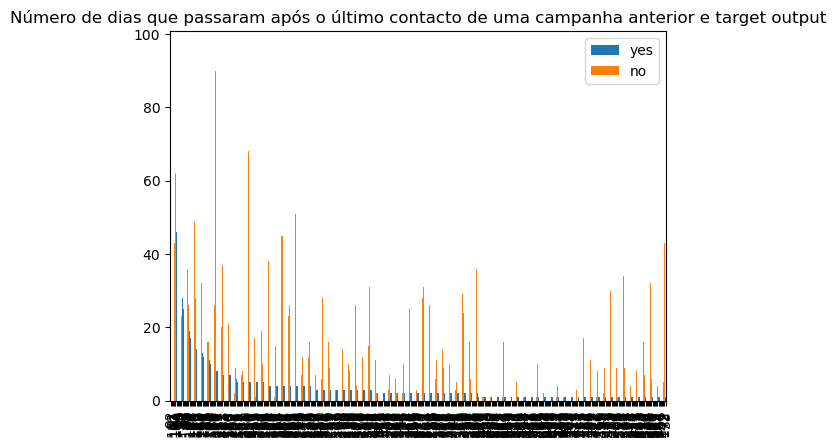

In [416]:
pdays_0 = pd.DataFrame()
pdays_0['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] > -1)]['pdays'].value_counts()
pdays_0['no'] = bank[(bank['y'] == 0) & (bank['pdays'] > -1)]['pdays'].value_counts()
pdays_0.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

In [417]:
#dividir o atributor pdays em 2 grupos: pdays = -1 e pdays > -1 e depois divir o grupo pdays > -1 em k bins
replace_map = {'pdays' : {}}
months = 0
for i in range(1, bank['pdays'].max() + 1):
    replace_map['pdays'][i] = months
    if i % 30 == 0:
        months += 1

bank.replace(replace_map, inplace=True)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,6,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

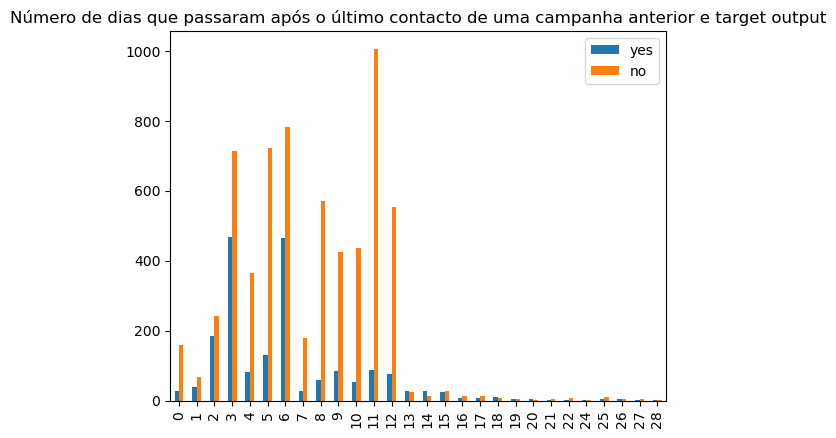

In [418]:
pdays_0 = pd.DataFrame()
pdays_0['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] > -1)]['pdays'].value_counts().sort_index()
pdays_0['no'] = bank[(bank['y'] == 0) & (bank['pdays'] > -1)]['pdays'].value_counts().sort_index()
pdays_0.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

In [419]:
bank['pdays'].unique()

array([-1,  5,  3,  2,  4,  6,  0,  1,  8,  7,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 20, 19, 22, 21, 25, 24, 26, 23, 27, 28, 29])

In [420]:
pdays_0.value_counts

<bound method DataFrame.value_counts of     yes    no
0    28   160
1    40    66
2   183   241
3   468   713
4    82   365
5   130   722
6   464   783
7    27   180
8    58   570
9    83   424
10   52   437
11   87  1006
12   76   552
13   27    23
14   27    12
15   25    26
16    7    12
17    8    14
18   10     8
19    4     5
20    3     1
21    1     5
22    2     7
24    2     1
25    3     9
26    5     3
27    1     3
28    2     1>

In [421]:
#percentagem do número de meses após ter sido efetuado um contacto com o cliente, e ele ter dito sim ao depósito
(pdays_0['yes'] / (pdays_0['yes'] + pdays_0['no'])) * 100

0     14.893617
1     37.735849
2     43.160377
3     39.627434
4     18.344519
5     15.258216
6     37.209302
7     13.043478
8      9.235669
9     16.370809
10    10.633947
11     7.959744
12    12.101911
13    54.000000
14    69.230769
15    49.019608
16    36.842105
17    36.363636
18    55.555556
19    44.444444
20    75.000000
21    16.666667
22    22.222222
24    66.666667
25    25.000000
26    62.500000
27    25.000000
28    66.666667
dtype: float64

### Atributo 'poutcome'

Observa-se que tem dois atributos - 'unknown' e 'other'.
O valor 'unknown' não traz informação adicional, pelo que justifica-se 
inseri-lo dentro do valor 'other'.
Apesar de não terem exatamente o mesmo significado, no contexto do problema, simbolizam o mesmo.

Adicionalmente, com label encoding, alteramos:
 - success -> 1
 - failure -> 0
 - other   -> -1
 
 ...uma vez que existe uma ordem implícita, desde exceção, sucesso e falha.
 Apesar da maioria esmagadora encontrar-se no other, temos pela observação do gráfico em cima que, quando é sucesso,
 a probabilidade de fazer um depósito é maior.

In [422]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [423]:
map_poutcome = { 'poutcome' : {'unknown' : 'other' }}
bank.replace(map_poutcome, inplace=True)

In [424]:
bank['poutcome'].value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [425]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(bank['poutcome'])
lb_results_bank = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_bank.head()

,failure,other,success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [426]:
bank = pd.concat([bank, lb_results_bank], axis=1)

In [427]:
bank.drop('poutcome', axis=1, inplace=True)

### Atributo 'balance'

Conseguimos visuaizar pela boxplot, que o atributo balance tem um elevado número
de outliers, nomeadamente no seu upper bound.

Deste modo, o seu tratamento vai divergir.

Definiu-se que se o número de outliers fosse inferior a 5%, procedia-se à remoção das respetivas linhas, caso contrário escolhia-se a melhor opção (neste caso para valores numéricos).

Como os valores no lower bound correspondem a menos de 5% dos dados, na totalidade, 
procede-se à sua remoção. São na totalidade 1962 correspondências.

Por outro lado, no upper bound, os outliers correspondem a 10% da totalidade dos dados; 
Neste caso, escolheu-se a transformação com log (Log Transformation) uma vez que o atributo tem valores muito enviesados.
Neste caso, os valores vão ser aproximados ao normal; dentro das possibilidades.

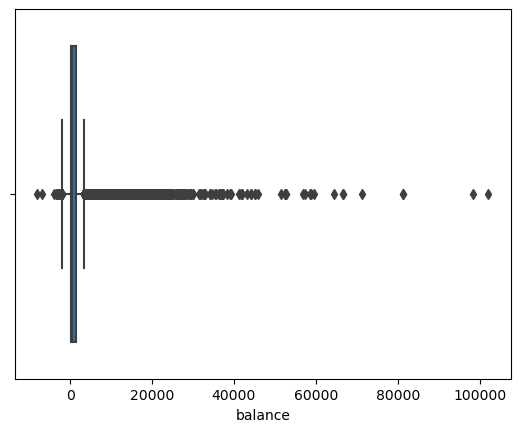

In [428]:
sns.boxplot(x = bank['balance'])
plt.show()

Obter o valore do lower e upper bound da feature balance.

In [429]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lowerLim = Q1 - 1.5 * IQR
upperLim = Q3 + 1.5 * IQR

print(lowerLim)
print(upperLim)

1356.0
-1962.0
3462.0


Obter o número de valores no upper e lower bound.

In [430]:
bank[bank['balance'] < lowerLim]['balance'].count()

17

In [431]:
bank[bank['balance'] > upperLim]['balance'].count()

4712

In [432]:
bank = bank.drop(bank.loc[bank['balance'] < lowerLim].index)
bank.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='balance'>

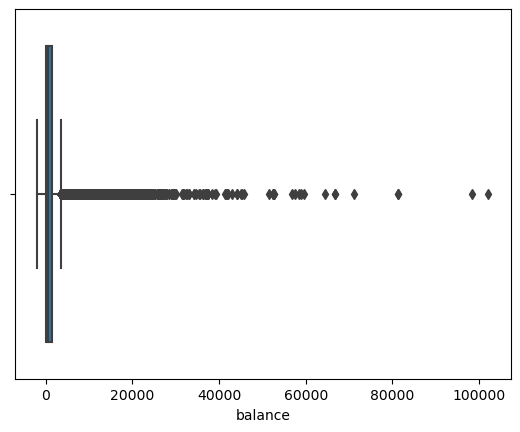

In [433]:
sns.boxplot(x = bank['balance'])

In [434]:
bank['balance'].mask(bank['balance'] > upperLim, upperLim, inplace=True)

<AxesSubplot:xlabel='balance'>

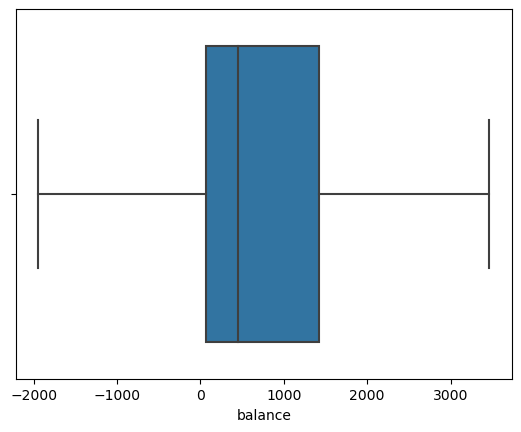

In [435]:
sns.boxplot(x = bank['balance'])

In [436]:
scaler = MinMaxScaler(feature_range=(-1,1))
bank['balance'] = scaler.fit_transform(bank[['balance']])

### Atributo 'previous'

Após uma breve análise do atributo previous, interpretou-se que o valor 0 tem um significado
especial em relação aos demais valores. 

Para além disso, existe uma grande discrepância nos
valores ̸= 0, levando à existência de bastantes outliers. 

Assim, optou-se por substituir como:
previous = 0 => "0"
previous > 0 => "1"
Permitindo categorizar entre: nunca ter recebido contacto ou já ter recebido, levando à manutenção da precisão global.

Ou seja, proceder a uma normalização dos dados.

In [437]:
bank['previous'].value_counts()

0      36937
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

<AxesSubplot:title={'center':'Número de contactos realizados antes desta campanha e target output'}>

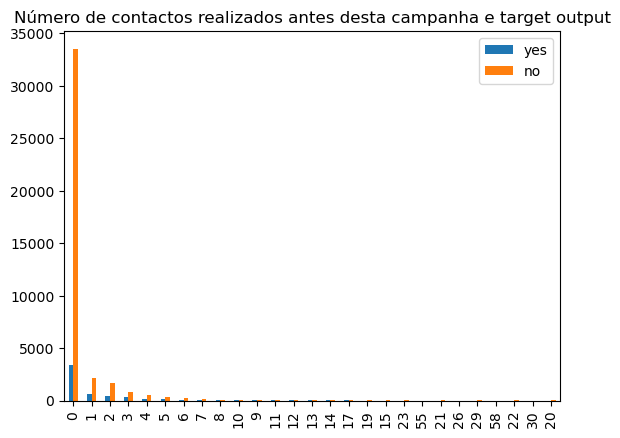

In [438]:
previous_target = pd.DataFrame()
previous_target['yes'] = bank[bank['y'] == 1]['previous'].value_counts()
previous_target['no'] = bank[bank['y'] == 0]['previous'].value_counts()
previous_target.plot.bar(title = 'Número de contactos realizados antes desta campanha e target output')

In [439]:
bank['previous'].mask(bank['previous'] > 0, 1, inplace=True)
print(bank['previous'])

0        0
1        0
2        0
3        0
4        0
        ..
45189    0
45190    0
45191    1
45192    0
45193    1
Name: previous, Length: 45194, dtype: int64


### Atributo 'age'

A análise da idade foi efetuado com recurso à construção de um scatter plot com o número de
ocorrências de cada idade. 

Pode-se visualizar que a distribução é pouco uniforme, com
maior ênfase na idade entre os 31 e 60 anos. 

Assim, para homogeneizar a amostra procedemos ao binning dos dados;
Neste caso, com 4 bins.


In [440]:
age_counts = bank['age'].value_counts()
bank['age_count'] = bank['age'].map(age_counts)
print(bank['age_count'])

0         740
1        1136
2        1972
3        1088
4        1972
         ... 
45189     934
45190      54
45191      52
45192     827
45193    1696
Name: age_count, Length: 45194, dtype: int64


<AxesSubplot:xlabel='age', ylabel='age_count'>

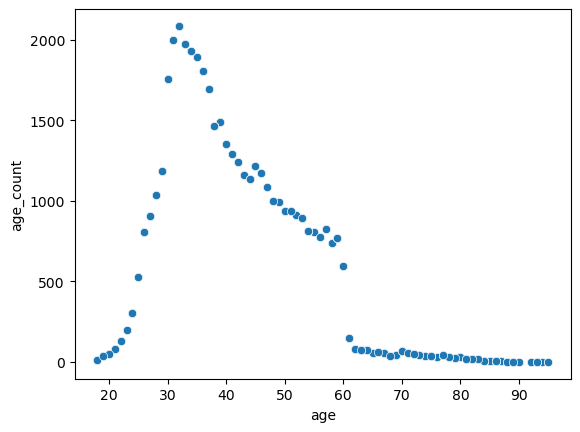

In [441]:
sns.scatterplot(data=bank, x="age", y="age_count")

In [442]:
bank = bank.drop('age_count', axis=1)

In [443]:
estimator = preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
bank['age'] = estimator.fit_transform(bank[['age']])

print('Bin Edges')
print(estimator.bin_edges_[0])
print('Age groups')
print (bank.groupby(by=['age']).count())

Bin Edges
[18. 33. 39. 48. 95.]
Age groups
       job  marital  education  default  balance  housing   loan  contact  \
age                                                                         
0.0  11110    11110      11110    11110    11110    11110  11110    11110   
1.0  10762    10762      10762    10762    10762    10762  10762    10762   
2.0  11147    11147      11147    11147    11147    11147  11147    11147   
3.0  12175    12175      12175    12175    12175    12175  12175    12175   

       day  month  duration  campaign  pdays  previous      y  failure  other  \
age                                                                             
0.0  11110  11110     11110     11110  11110     11110  11110    11110  11110   
1.0  10762  10762     10762     10762  10762     10762  10762    10762  10762   
2.0  11147  11147     11147     11147  11147     11147  11147    11147  11147   
3.0  12175  12175     12175     12175  12175     12175  12175    12175  12175   

     su

### Atributo 'education'

Neste caso, será feito label enconding, por existir uma ordem explícita, com a exceção do caso unknown.
Este último representa uma pequena parte do dataset, pelo que será removido.

In [444]:
#bank['education'].value_counts()

In [445]:
#bank.drop(bank[bank['education'] == "unknown"].index, inplace=True)
#bank.reset_index(drop=True, inplace=True)

In [446]:
#map_education = { 'education' : {'primary' : 1, 'secondary' : 2, 'tertiary' : 3 }}
#bank.replace(map_education, inplace=True)
#bank

### Análise do heatmap

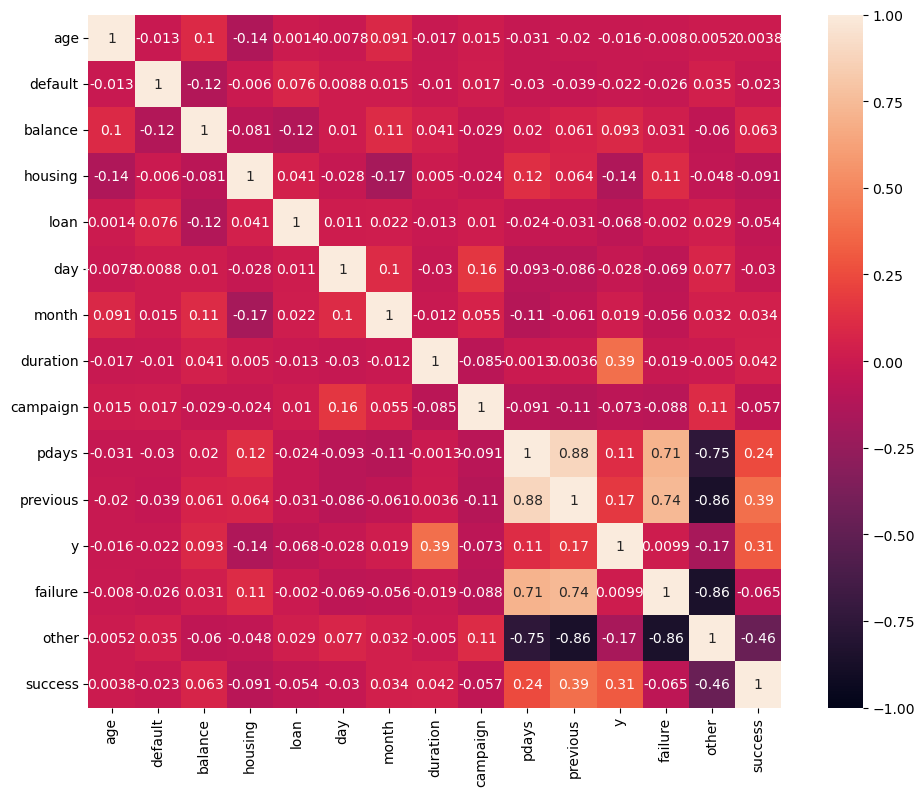

In [447]:
#Correlation
corr_matrix = bank.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

### Atributo 'job' 
 - Remover os valores não conhecidos ('unknown').
 - Utilizar o binary encoding uma vez que o atributo job é categórico e não apresenta qualquer ordem e porque gera menos complexidade(menos colunas) que o one-hot enconding.

In [448]:
#percentagem de unknows em job
(bank[bank['job'] == "unknown"]['job'].count() / bank['job'].count()) * 100

0.6372527326636279

In [449]:
bank.drop(bank[bank['job'] == 'unknown'].index, inplace=True)
bank.reset_index(drop=True, inplace=True)
bank_data = bank.copy()
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,failure,other,success
0,3.0,management,married,tertiary,0,0.512024,1,0,unknown,5,5,261,1,-1,0,0,0,1,0
1,2.0,technician,single,secondary,0,-0.270070,1,0,unknown,5,5,151,1,-1,0,0,0,1,0
2,1.0,entrepreneur,married,secondary,0,-0.280059,1,1,unknown,5,5,76,1,-1,0,0,0,1,0
3,2.0,blue-collar,married,unknown,0,0.276360,1,0,unknown,5,5,92,1,-1,0,0,0,1,0
4,1.0,management,married,tertiary,0,-0.195339,1,0,unknown,5,5,139,1,-1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44901,3.0,technician,married,tertiary,0,0.024417,0,0,cellular,17,11,977,3,-1,0,1,0,1,0
44902,3.0,retired,divorced,primary,0,0.358861,0,0,cellular,17,11,456,2,-1,0,1,0,1,0
44903,3.0,retired,married,secondary,0,1.000000,0,0,cellular,17,11,1127,5,6,1,1,0,0,1
44904,3.0,blue-collar,married,secondary,0,-0.033666,0,0,telephone,17,11,508,4,-1,0,0,0,1,0


In [450]:
#binary enconding para job substituindo a coluna job por uma binária
enconder = ce.BinaryEncoder(cols=['job'], return_df=True)
bank = enconder.fit_transform(bank)
bank

,age,job_0,job_1,job_2,job_3,marital,education,default,balance,housing,...,day,month,duration,campaign,pdays,previous,y,failure,other,success
0,3.0,0,0,0,1,married,tertiary,0,0.512024,1,...,5,5,261,1,-1,0,0,0,1,0
1,2.0,0,0,1,0,single,secondary,0,-0.270070,1,...,5,5,151,1,-1,0,0,0,1,0
2,1.0,0,0,1,1,married,secondary,0,-0.280059,1,...,5,5,76,1,-1,0,0,0,1,0
3,2.0,0,1,0,0,married,unknown,0,0.276360,1,...,5,5,92,1,-1,0,0,0,1,0
4,1.0,0,0,0,1,married,tertiary,0,-0.195339,1,...,5,5,139,1,-1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44901,3.0,0,0,1,0,married,tertiary,0,0.024417,0,...,17,11,977,3,-1,0,1,0,1,0
44902,3.0,0,1,0,1,divorced,primary,0,0.358861,0,...,17,11,456,2,-1,0,1,0,1,0
44903,3.0,0,1,0,1,married,secondary,0,1.000000,0,...,17,11,1127,5,6,1,1,0,0,1
44904,3.0,0,1,0,0,married,secondary,0,-0.033666,0,...,17,11,508,4,-1,0,0,0,1,0


#### Atributo 'marital', 'contact' e 'education'
 - Remover devido a não existir qualquer relação entre os difentes valores destes atributos e o target(a proporção entres os valores dos atributos e o target são próximas), tal como se pode verificar na secção de análise dos dados.

In [451]:
bank.drop('marital', axis=1, inplace=True)

In [452]:
bank.drop('contact', axis=1, inplace=True)

In [453]:
bank.drop('education', axis=1, inplace=True)

In [454]:
bank

,age,job_0,job_1,job_2,job_3,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,failure,other,success
0,3.0,0,0,0,1,0,0.512024,1,0,5,5,261,1,-1,0,0,0,1,0
1,2.0,0,0,1,0,0,-0.270070,1,0,5,5,151,1,-1,0,0,0,1,0
2,1.0,0,0,1,1,0,-0.280059,1,1,5,5,76,1,-1,0,0,0,1,0
3,2.0,0,1,0,0,0,0.276360,1,0,5,5,92,1,-1,0,0,0,1,0
4,1.0,0,0,0,1,0,-0.195339,1,0,5,5,139,1,-1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44901,3.0,0,0,1,0,0,0.024417,0,0,17,11,977,3,-1,0,1,0,1,0
44902,3.0,0,1,0,1,0,0.358861,0,0,17,11,456,2,-1,0,1,0,1,0
44903,3.0,0,1,0,1,0,1.000000,0,0,17,11,1127,5,6,1,1,0,0,1
44904,3.0,0,1,0,0,0,-0.033666,0,0,17,11,508,4,-1,0,0,0,1,0


#### O target output "y" tem correlação alta com o atributo duration.

In [455]:
bankCorr = bank.corr()
bankCorr

,age,job_0,job_1,job_2,job_3,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,failure,other,success
age,1.000000,-0.036540,0.059154,-0.110048,0.050953,-0.013002,0.099268,-0.136434,0.002971,-0.006908,0.090654,-0.017301,0.014507,-0.030430,-0.019193,-0.016207,-0.007451,0.004682,0.003809
job_0,-0.036540,1.000000,-0.338684,-0.019844,0.004849,-0.001890,0.022075,-0.123878,-0.060210,-0.005850,0.002119,0.007692,-0.014504,-0.015896,0.000854,0.038178,-0.013301,-0.001468,0.025891
job_1,0.059154,-0.338684,1.000000,-0.039989,-0.259321,-0.002576,-0.058534,0.141252,0.046822,-0.034682,-0.105532,0.009778,-0.021852,0.031785,-0.000456,-0.037473,0.009739,0.004225,-0.025080
job_2,-0.110048,-0.019844,-0.039989,1.000000,-0.216701,-0.003883,-0.056003,0.006831,0.041227,0.009033,-0.002231,-0.021701,-0.004604,0.001258,0.003405,-0.009345,0.003555,-0.001180,-0.003864
job_3,0.050953,0.004849,-0.259321,-0.216701,1.000000,-0.000946,0.065786,-0.122892,-0.034904,-0.001092,0.044463,0.009681,-0.013542,-0.006723,0.017969,0.068122,-0.002689,-0.018763,0.041116
default,-0.013002,-0.001890,-0.002576,-0.003883,-0.000946,1.000000,-0.120994,-0.006848,0.075671,0.008943,0.014733,-0.010089,0.017627,-0.030380,-0.039183,-0.021980,-0.026108,0.035230,-0.023231
balance,0.099268,0.022075,-0.058534,-0.056003,0.065786,-0.120994,1.000000,-0.079633,-0.118354,0.010568,0.107741,0.041071,-0.030238,0.019972,0.061527,0.093455,0.030803,-0.060164,0.063549
housing,-0.136434,-0.123878,0.141252,0.006831,-0.122892,-0.006848,-0.079633,1.000000,0.038836,-0.028979,-0.174068,0.004703,-0.022591,0.118997,0.062812,-0.140057,0.106432,-0.047592,-0.091887
loan,0.002971,-0.060210,0.046822,0.041227,-0.034904,0.075671,-0.118354,0.038836,1.000000,0.011027,0.021910,-0.013140,0.010600,-0.024348,-0.031604,-0.068751,-0.002266,0.029865,-0.054105
day,-0.006908,-0.005850,-0.034682,0.009033,-0.001092,0.008943,0.010568,-0.028979,0.011027,1.000000,0.103349,-0.030394,0.161673,-0.093415,-0.086385,-0.028650,-0.068821,0.077005,-0.030418


In [456]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44906 entries, 0 to 44905
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       44906 non-null  float64
 1   job_0     44906 non-null  int64  
 2   job_1     44906 non-null  int64  
 3   job_2     44906 non-null  int64  
 4   job_3     44906 non-null  int64  
 5   default   44906 non-null  int64  
 6   balance   44906 non-null  float64
 7   housing   44906 non-null  int64  
 8   loan      44906 non-null  int64  
 9   day       44906 non-null  int64  
 10  month     44906 non-null  int64  
 11  duration  44906 non-null  int64  
 12  campaign  44906 non-null  int64  
 13  pdays     44906 non-null  int64  
 14  previous  44906 non-null  int64  
 15  y         44906 non-null  int64  
 16  failure   44906 non-null  int64  
 17  other     44906 non-null  int64  
 18  success   44906 non-null  int64  
dtypes: float64(2), int64(17)
memory usage: 6.5 MB


## Implementar treino com Decision trees

Implementação do treino dos dados utilizando árvores de decisão.
A distribuição dos dados para treino foi de 25% (standard).

In [457]:
X = bank.drop(['y'], axis=1)
y = bank['y'].to_frame()

In [458]:
X

,age,job_0,job_1,job_2,job_3,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,failure,other,success
0,3.0,0,0,0,1,0,0.512024,1,0,5,5,261,1,-1,0,0,1,0
1,2.0,0,0,1,0,0,-0.270070,1,0,5,5,151,1,-1,0,0,1,0
2,1.0,0,0,1,1,0,-0.280059,1,1,5,5,76,1,-1,0,0,1,0
3,2.0,0,1,0,0,0,0.276360,1,0,5,5,92,1,-1,0,0,1,0
4,1.0,0,0,0,1,0,-0.195339,1,0,5,5,139,1,-1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44901,3.0,0,0,1,0,0,0.024417,0,0,17,11,977,3,-1,0,0,1,0
44902,3.0,0,1,0,1,0,0.358861,0,0,17,11,456,2,-1,0,0,1,0
44903,3.0,0,1,0,1,0,1.000000,0,0,17,11,1127,5,6,1,0,0,1
44904,3.0,0,1,0,0,0,-0.033666,0,0,17,11,508,4,-1,0,0,1,0


In [459]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
44901,1
44902,1
44903,1
44904,0


In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, stratify=y)

In [461]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [462]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 0])

### Testar os resultados
 - matriz de confusão
 - accuracy
 - precision
 - recall
 - ROC - AUC

In [463]:
confusion_matrix(y_test, predictions)

array([[7380,  551],
       [ 553,  498]])

In [464]:
accuracy_score(y_test, predictions)

0.8770875083500334

In [465]:
precision_score(y_test, predictions)

0.4747378455672069

In [466]:
recall_score(y_test, predictions)

0.4738344433872502

In [467]:
roc_auc_score(y_test, predictions)

0.7021801141409835

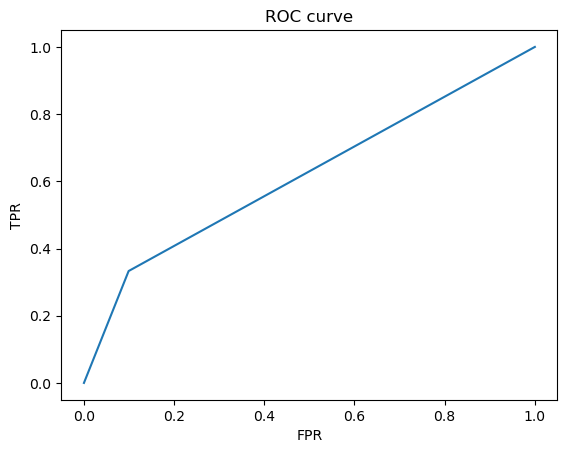

In [384]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Implementar treino com Support Vector Machines (SVM's)

Num passo seguinte, procedeu-se à tentativa do treino através de support vector machines.

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34540 entries, 37239 to 12772
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       34540 non-null  float64
 1   job_0     34540 non-null  int64  
 2   job_1     34540 non-null  int64  
 3   job_2     34540 non-null  int64  
 4   job_3     34540 non-null  int64  
 5   default   34540 non-null  int64  
 6   balance   34540 non-null  float64
 7   housing   34540 non-null  int64  
 8   loan      34540 non-null  int64  
 9   day       34540 non-null  int64  
 10  month     34540 non-null  int64  
 11  duration  34540 non-null  int64  
 12  campaign  34540 non-null  int64  
 13  pdays     34540 non-null  int64  
 14  previous  34540 non-null  int64  
 15  poutcome  34540 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 4.5 MB


In [84]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X_train, np.ravel(y_train), cv=10)
scores

array([0.89171975, 0.89200926, 0.88766647, 0.88621888, 0.89432542,
       0.89229878, 0.88882455, 0.88824551, 0.89114071, 0.88621888])

In [85]:
print("%0.2f accuracy" % (scores.mean() * 100))

88.99 accuracy


In [86]:
model = SVC(random_state=2021)
model.fit(X_train, np.ravel(y_train))

SVC(random_state=2021)

In [87]:
predictions = model.predict(X_test)

In [88]:
print("%0.2f accuracy" % accuracy_score(y_test, predictions))

0.89 accuracy


/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


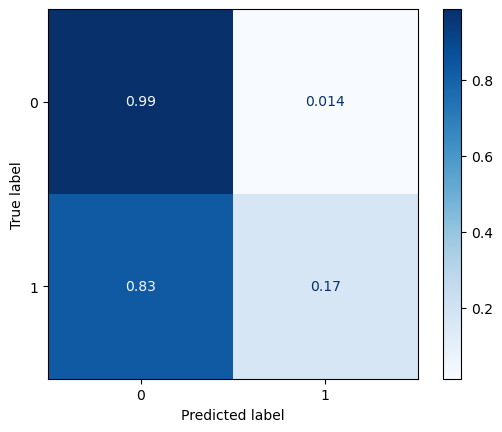

In [89]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [90]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7632
           1       0.61      0.17      0.27      1004

    accuracy                           0.89      8636
   macro avg       0.76      0.58      0.60      8636
weighted avg       0.87      0.89      0.86      8636



In [91]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}

In [92]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3)

In [93]:
grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time= 2.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time= 2.8min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time= 3.2min


In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
plot_confusion_matrix(grid, X_test, y_test)

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

### Implementar o treino com MLP (redes neurais)

Por fim, aplicar o treino com MLP's.

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

In [83]:
RANDOM_SEED = 2021

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  1.13.1


In [84]:
#Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
#scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [85]:
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,services,student,technician,unemployed,divorced,married,single,cellular,telephone,unknown
0,58,3,0,0.512024,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,-0.270070,1,0,5,5,151,1,...,0,0,1,0,0,0,1,0,0,1
2,33,2,0,-0.280059,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,35,3,0,-0.195339,1,0,5,5,139,1,...,0,0,0,0,0,1,0,0,0,1
4,28,3,0,-0.115427,1,1,5,5,217,1,...,0,0,0,0,0,0,1,0,0,1


In [86]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)

In [130]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(32, input_dim=16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model

In [131]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 16)                512       
_________________________________________________________________
dense_211 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_212 (Dense)            (None, 1)                 9         
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [132]:
TUNING_DICT = {
    #'activation': ['relu', 'sigmoid'],
    'learning_rate' : [0.01, 0.001],
    'batch_size' : [32],
    'epochs' : [20]
}

In [133]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           refit= 'True'
                           verbose = 1)

grid_search.fit(X_train, y_train, validation_split=0.2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train on 19342 samples, validate on 4836 samples
Instructions for updating:
Use tf.cast instead.


2022-11-22 22:44:50.761555: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-11-22 22:44:50.792399: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208005000 Hz
2022-11-22 22:44:50.795261: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x559929d8dce0 executing computations on platform Host. Devices:
2022-11-22 22:44:50.795320: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Epoch 1/20
19342/19342 [==============================] - 2s 126us/sample - loss: 14.1612 - acc: 0.1117 - val_loss: 14.0040 - val_acc: 0.1216
Epoch 2/20
19342/19342 [==============================] - 2s 90us/sample - loss: 14.1612 - acc: 0.1117 - val_loss: 14.0040 - val_acc: 0.1216
Epoch 3/20
19342/19342 [==============================] - 2s 89us/sample - loss: 14.1612 - acc: 0.1117 - val_loss: 14.0040 - val_acc: 0.1216
Epoch 4/20
19342/19342 [==============================] - 2s 105us/sample - loss: 14.1612 - acc: 0.1117 - val_loss: 14.0040 - val_acc: 0.1216
Epoch 5/20
19342/19342 [==============================] - 3s 136us/sample - loss: 14.1612 - acc: 0.1117 - val_loss: 14.0040 - val_acc: 0.1216
Epoch 6/20
19342/19342 [==============================] - 2s 101us/sample - loss: 14.1612 - acc: 0.1117 - val_loss: 14.0040 - val_acc: 0.1216
Epoch 7/20
19342/19342 [==============================] - 2s 95us/sample - loss: 14.1612 - acc: 0.1117 - val_loss: 14.0040 - val_acc: 0.1216
Epoch 8/2

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2eec9fb198>,
             param_grid={'activation': ['relu', 'sigmoid'], 'batch_size': [32],
                         'epochs': [20], 'learning_rate': [0.001]},
             scoring='accuracy', verbose=1)

In [134]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
accuracy = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for accuracy, param in zip(accuracy, params):
    print("%f with: %r" % (accuracy, param))

Best: 0.114317 using {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001}
0.114317 with: {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001}
0.114317 with: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001}


In [135]:
best_mlp_model = grid_search.best_estimator_

In [136]:
!pip install livelossplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 kB 4.1 MB/s eta 0:00:0000:0100:01


In [137]:
from livelossplot import PlotLossesKerasTF

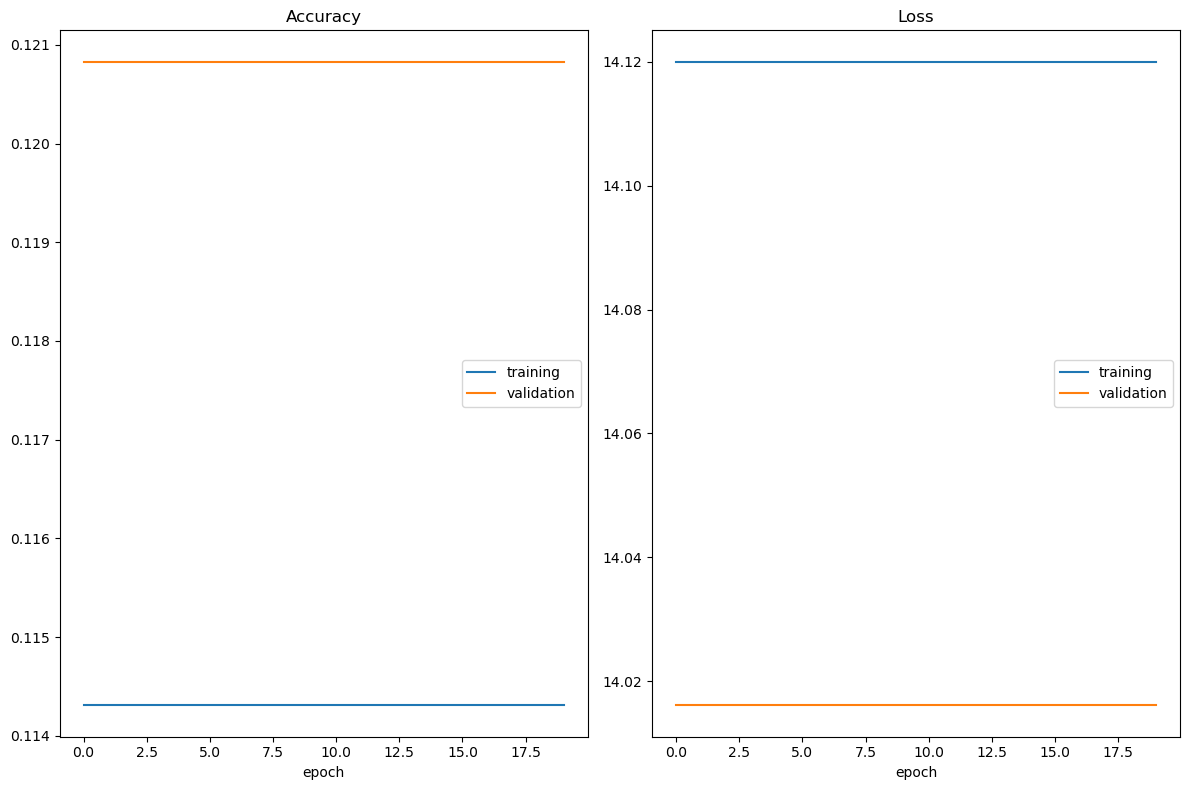

Accuracy
	training         	 (min:    0.114, max:    0.114, cur:    0.114)
	validation       	 (min:    0.121, max:    0.121, cur:    0.121)
Loss
	training         	 (min:   14.120, max:   14.120, cur:   14.120)
	validation       	 (min:   14.016, max:   14.016, cur:   14.016)
30223/30223 [==============================] - 4s 138us/sample - loss: 14.1199 - acc: 0.1143 - val_loss: 14.0162 - val_acc: 0.1208


In [138]:
best_mlp_model.fit(X_train, y_train, 
                   validation_data=(X_test, y_test),
                   callbacks=[PlotLossesKerasTF()], verbose=1)

In [139]:
predictions = best_mlp_model.predict(X_test)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [140]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.8791785686713502
Mean Squared Error: 0.8791785686713502
Root Mean Squared Error: 0.9376452253765015


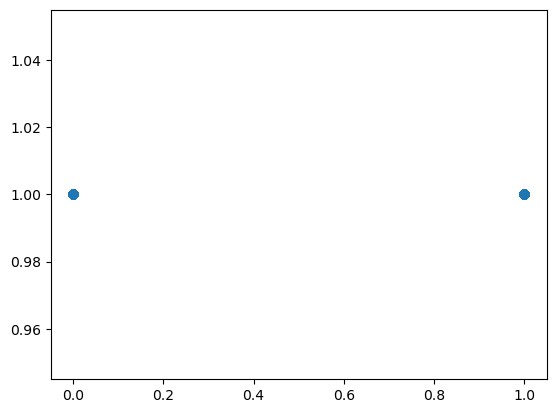

In [141]:
plt.scatter(y_test, predictions)